In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('1d82f471e4b9df7304fb88af01091386.csv')
df

x1   x2   x3           y
0   1.0  1.0  0.1   23.000000
1   1.0  1.0  0.2   95.597496
2   1.0  1.0  0.3  156.977804
3   1.0  1.0  0.4  210.147846
4   1.0  1.0  0.5  257.047146
..  ...  ...  ...         ...
67  0.5  0.5  0.6   18.531250
68  0.5  0.5  0.7   56.482223
69  0.5  0.5  0.8   91.128746
70  0.5  0.5  0.9  123.000458
71  0.5  0.5  1.0  152.509054

[72 rows x 4 columns]

In [36]:
l = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
d = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
c = np.arange(-500,501)

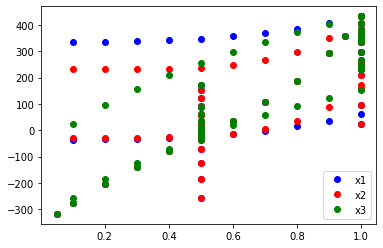

In [55]:
x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()
x3 = df['x3'].to_numpy()

y = df['y'].to_numpy()

plt.plot(x1,y,'bo',label='x1')
plt.plot(x2,y,'ro',label='x2')
plt.plot(x3,y,'go',label='x3')
plt.legend()

# Trying to find correlation between xi's and y

Observations:
1. y is changing drastically for all x1,x2,x3 at 0.5 and 1.0.
2. x1 and x2 are largely overlapping, so they might be similar, and x3 might be different.
3. for x1 and x2, y is increasing convexly from 0.1 to 1.0, whereas, for x3, y is increasing concavely from 0.1 to 1.0.
4. So, x3 might be logarithmic, since atmost one logarithmic function is possible.
5. Will check for all possible values of d1 & d2 for x1^d1 and x2^d2 respectively and all possible values of l3 for log(x3+l3).

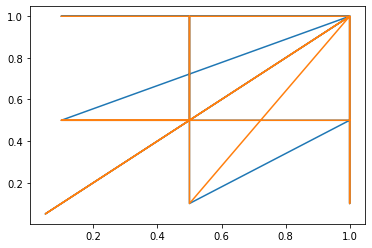

In [24]:
plt.plot(x1,x2)
# plt.plot(x2,x3)
plt.plot(x3,x1)
# Trying to find correlation between xi's

### Brute Force Method is discussed

In [ ]:
# Brute force for no logarithmic functions

fl=1 # flag varibale
# if fl = 0, means equation is found

for d1 in d:
    for d2 in d:
        for d3 in d:
            for c1 in c:
                for c2 in c:
                    for c3 in c:
                        if d1==0 or d2==0 or d3==0: # Since di is NOT equal to 0
                            continue
                        for i in df.index:
                            x1=df['x1'][i]; x2=df['x2'][i]; x3=df['x3'][i]; y = df['y'][i]
                            err = abs(c1*x1**d1 + c2*x2**d2 + c3*x3**d3 - y)
                            if err>0.1:
                                fl=0
                                break
                        if fl==1:
                            print('Found eq with no log function & with parameters', d1,d2,d3,c1,c2,c3)

In [ ]:
# Brute force for logarithmic functions only on 'x1'

for l1 in l:
    for d2 in d:
        for d3 in d:
            for c1 in c:
                for c2 in c:
                    for c3 in c:
                        if d2==0 or d3==0: # Since di is NOT equal to 0
                            continue
                        for i in df.index:
                            x1=df['x1'][i]; x2=df['x2'][i]; x3=df['x3'][i]; y = df['y'][i]
                            err = abs(c1*np.log(x1+l1) + c2*x2**d2 + c3*x3**d3 - y)
                            if err>0.1:
                                fl=0
                                break
                        if fl==0:
                            print('Found eq with log function on x1 & with parameters', l1,d2,d3,c1,c2,c3)

In [ ]:
# Brute force for logarithmic functions only on 'x2'

for d1 in d:
    for l2 in l:
        for d3 in d:
            for c1 in c:
                for c2 in c:
                    for c3 in c:
                        if d1==0 or d3==0: # Since di is NOT equal to 0
                            continue
                        for i in df.index:
                            x1=df['x1'][i]; x2=df['x2'][i]; x3=df['x3'][i]; y = df['y'][i]
                            err = abs(c1*x1**d1 + c2*np.log(x2+l2) + c3*x3**d3 - y)
                            if err>0.1:
                                fl=0
                                break
                        if fl==0:
                            print('Found eq with log function on x2 & with parameters', d1,l2,d3,c1,c2,c3)

In [ ]:
# Brute force for logarithmic functions only on 'x3'

for d1 in d:
    for d2 in d:
        for l3 in l:
            for c1 in c:
                for c2 in c:
                    for c3 in c:
                        if d1==0 or d2==0: # Since di is NOT equal to 0
                            continue
                        fl=1
                        for i in df.index:
                            x1=df['x1'][i]; x2=df['x2'][i]; x3=df['x3'][i]; y = df['y'][i]
                            err = abs(c1*x1**d1 + c2*x2**d2 + c3*np.log(x3+l3) - y)
                            if err>0.1:
                                fl=0
                                break
                        if fl==0:
                            print('Found eq with log function on x3 & with parameters', d1,d2,l3,c1,c2,c3)